<a href="https://colab.research.google.com/github/Rafe2001/Stock_Trend_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.model.layers import Dense, Dropout, LSTM
plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas-datareader
!pip install yfinance

In [ ]:
import yfinance as yf

# Define date range
start_date = '2012-01-01'
end_date = '2023-08-01'

# Fetch data from Yahoo Finance using yfinance
stock_symbol = 'AAPL'  # Apple Inc.
df = yf.download(stock_symbol, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466090,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672228,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804702,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [ ]:
df=df.reset_index()
df.shape

(2912, 7)

Text(0, 0.5, 'Close Price USD ($)')

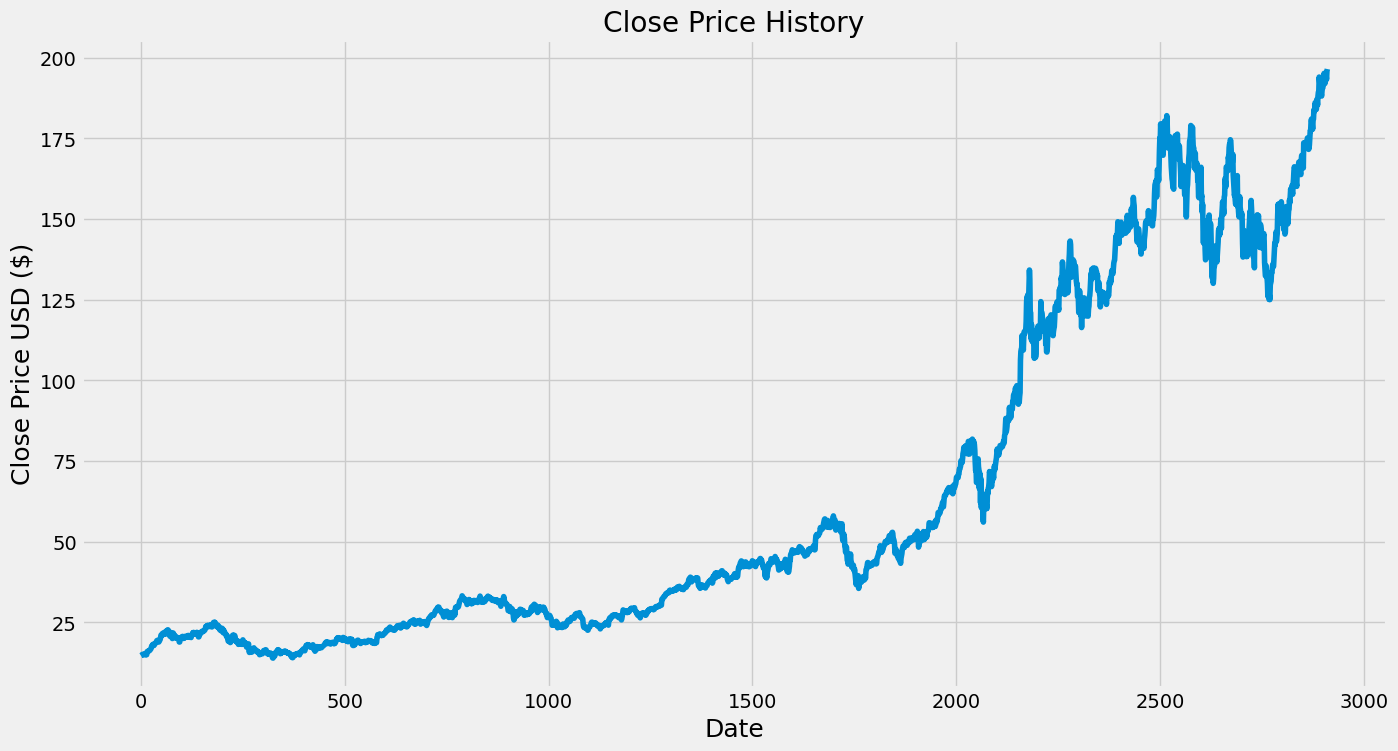

In [ ]:
#visualize the closing price history
plt.figure(figsize=(15,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize= 18)

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2907    172.9063
2908    173.3922
2909    173.8141
2910    174.2341
2911    174.6826
Name: Close, Length: 2912, dtype: float64

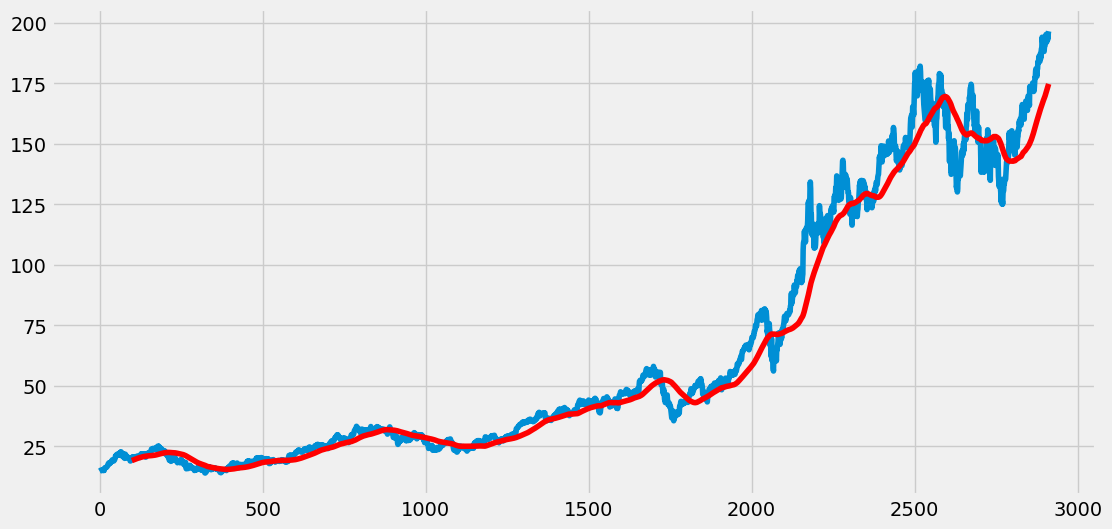

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2907    157.94185
2908    158.18720
2909    158.45285
2910    158.72990
2911    159.01725
Name: Close, Length: 2912, dtype: float64

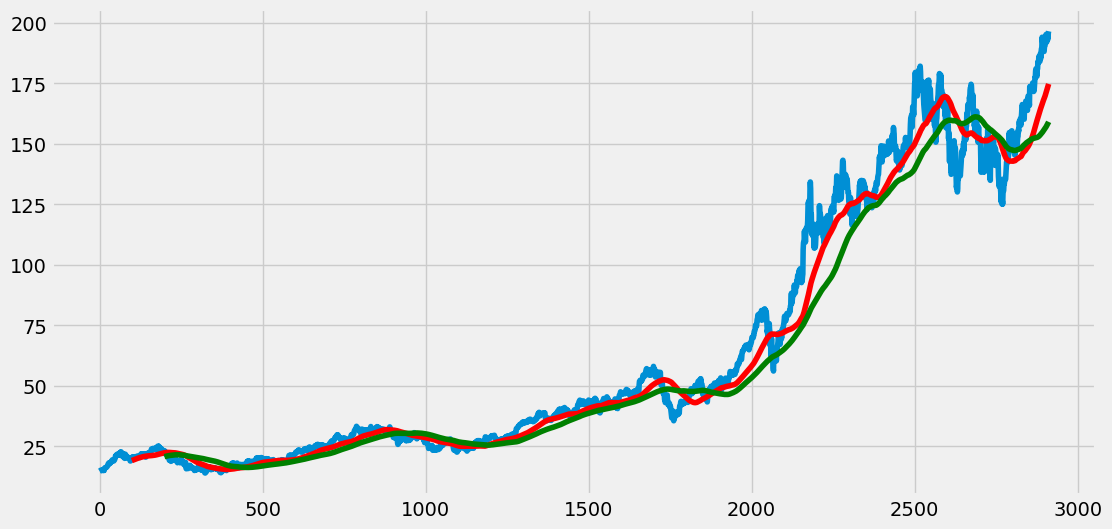

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2912, 7)

In [ ]:
#Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2329, 1)
(583, 1)


In [ ]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [ ]:
data_testing.head()

,Close
2329,127.900002
2330,130.360001
2331,133.000000
2332,131.240005
2333,134.429993


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#Scaling the data
data_training_scale = scaler.fit_transform(data_training)
data_training_scale.shape

(2329, 1)

In [ ]:
#Data into X_train and Y_train

X_train = []
y_train = []

for i in range(100, data_training_scale.shape[0]):
  X_train.append(data_training_scale[i-100:i])
  y_train.append(data_training_scale[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(2229, 100, 1)

In [ ]:
#ML Model
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
               input_shape= (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(X_train,y_train, epochs = 50)

Epoch 1/50
70/70 [==============================] - 70s 749ms/step - loss: 0.0279
Epoch 2/50
70/70 [==============================] - 51s 734ms/step - loss: 0.0049
Epoch 3/50
70/70 [==============================] - 49s 708ms/step - loss: 0.0034
Epoch 4/50
70/70 [==============================] - 61s 871ms/step - loss: 0.0032
Epoch 5/50
70/70 [==============================] - 50s 709ms/step - loss: 0.0030
Epoch 6/50
70/70 [==============================] - 49s 706ms/step - loss: 0.0028
Epoch 7/50
70/70 [==============================] - 49s 699ms/step - loss: 0.0024
Epoch 8/50
70/70 [==============================] - 49s 701ms/step - loss: 0.0027
Epoch 9/50
70/70 [==============================] - 49s 699ms/step - loss: 0.0025
Epoch 10/50
70/70 [==============================] - 49s 708ms/step - loss: 0.0022
Epoch 11/50
70/70 [==============================] - 49s 704ms/step - loss: 0.0025
Epoch 12/50
70/70 [==============================] - 49s 707ms/step - loss: 0.0025
Epoch 13/50
7

In [ ]:
model.save("Keras_Model.h5")

In [ ]:
data_testing.head()

,Close
2329,127.900002
2330,130.360001
2331,133.000000
2332,131.240005
2333,134.429993


In [ ]:
data_training.tail(100)

,Close
2229,115.970001
2230,119.489998
2231,119.209999
2232,119.260002
2233,120.300003
...,...
2324,119.900002
2325,122.150002
2326,123.000000
2327,125.900002


In [ ]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

<ipython-input-28-5333abc8927a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,115.970001
1,119.489998
2,119.209999
3,119.260002
4,120.300003


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02566589],
       [0.06828087],
       [0.06489105],
       [0.06549641],
       [0.07808722],
       [0.06707023],
       [0.05060533],
       [0.05799033],
       [0.04225179],
       [0.        ],
       [0.01598063],
       [0.02639226],
       [0.03317189],
       [0.06295405],
       [0.10738502],
       [0.11174338],
       [0.11004848],
       [0.10169494],
       [0.11985474],
       [0.12748183],
       [0.09600485],
       [0.11368038],
       [0.10363203],
       [0.09600485],
       [0.16985471],
       [0.16900726],
       [0.17978207],
       [0.15508481],
       [0.17409198],
       [0.21828095],
       [0.20714296],
       [0.2193705 ],
       [0.27651337],
       [0.25447938],
       [0.24055694],
       [0.22808722],
       [0.18837779],
       [0.20774814],
       [0.15435836],
       [0.2066586 ],
       [0.22033904],
       [0.18317188],
       [0.18099279],
       [0.20629541],
       [0.18232452],
       [0.1608959 ],
       [0.16924944],
       [0.220

In [ ]:
input_data.shape

(683, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(583, 100, 1)
(583,)


In [ ]:
#making prediction
y_pred = model.predict(x_test)
y_pred.shape

19/19 [==============================] - 2s 69ms/step


(583, 1)

In [ ]:
y_pred

array([[0.13208866],
       [0.1336342 ],
       [0.13645469],
       [0.1404898 ],
       [0.14525078],
       [0.1505827 ],
       [0.15639463],
       [0.16252522],
       [0.16896035],
       [0.1756926 ],
       [0.18258075],
       [0.18946382],
       [0.19673447],
       [0.20422624],
       [0.21136989],
       [0.21798858],
       [0.22387093],
       [0.2288104 ],
       [0.232424  ],
       [0.23465636],
       [0.23510881],
       [0.2335757 ],
       [0.23055889],
       [0.22678527],
       [0.22266111],
       [0.21846324],
       [0.21424058],
       [0.2100399 ],
       [0.20603025],
       [0.20217384],
       [0.19830953],
       [0.19434375],
       [0.19045599],
       [0.18681051],
       [0.18366817],
       [0.18114553],
       [0.17931435],
       [0.17802966],
       [0.17703283],
       [0.1760494 ],
       [0.17493607],
       [0.1735054 ],
       [0.17186409],
       [0.17019287],
       [0.16874467],
       [0.16776231],
       [0.16730669],
       [0.167

In [ ]:
scaler.scale_

array([0.01210654])

In [ ]:
scale_factor = 1/0.01210654
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

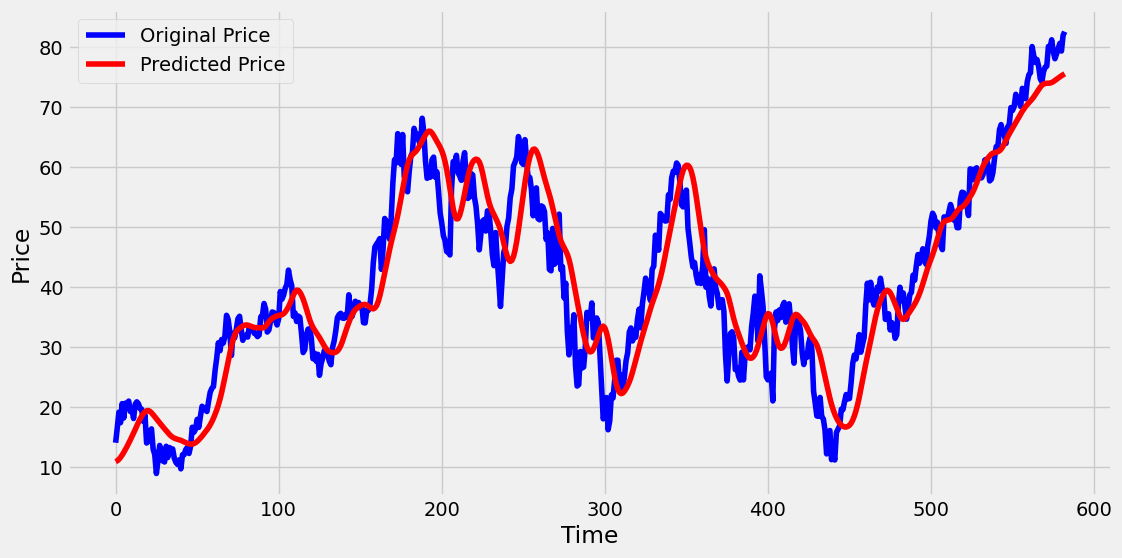

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()